In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn import tree, ensemble, model_selection, metrics
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn import datasets, naive_bayes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import re
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statistics 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from itertools import cycle
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv("data_london/listing_data_clean_final.csv")

print(data.shape)

(57636, 51)


In [5]:
pd.set_option('display.max_columns', None)
data

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,property_room_type
0,0.80,0.88,0,4.0,1,1,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,21,6,0,moderate,0,0,0.18,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,Apartment_Private room
1,1.00,0.86,0,1.0,1,1,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,89,4,1,strict_14_with_grace_period,1,1,0.70,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,Apartment_Entire home/apt
2,0.80,0.95,0,18.0,1,1,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,42,2,1,strict_14_with_grace_period,0,0,0.38,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,Apartment_Entire home/apt
3,1.00,0.93,1,1.0,1,0,51.44687,-0.21874,1,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,65.0,350.0,55.0,2,11.0,21,1125,35,8,0,moderate,0,0,0.69,3694.0,1531.0,South,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,2,Apartment_Entire home/apt
4,0.90,1.00,1,3.0,1,0,51.57224,-0.20906,1,Apartment,Private room,2,1.5,1.0,0.0,Real Bed,29.0,100.0,0.0,1,8.0,10,1120,129,8,1,strict_14_with_grace_period,0,0,1.05,3692.0,3683.0,North,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,2,Apartment_Private room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57631,0.77,0.80,0,3.0,1,1,51.46290,0.02656,0,Apartment,Entire home/apt,5,2.0,2.0,3.0,Real Bed,160.0,0.0,60.0,1,50.0,1,20,4,4,1,strict_14_with_grace_period,0,0,4.00,1910.0,25.0,East,0.761644,0.716,1,1,0,1,0,1,1,0,1,1,4479.281618,2331.621327,3584.569864,22.0,2,Apartment_Entire home/apt
57632,1.00,1.00,0,1.0,1,0,51.48265,-0.42826,1,Apartment,Entire home/apt,5,1.0,1.0,4.0,Real Bed,90.0,150.0,0.0,1,10.0,1,1125,1,1,1,flexible,0,0,1.00,107.0,30.0,West,0.024658,0.635,1,1,1,1,1,1,1,1,0,1,1778.737661,29768.254862,30354.228360,30.0,2,Apartment_Entire home/apt
57633,0.77,0.80,0,3.0,1,1,51.51307,-0.06974,1,Apartment,Entire home/apt,5,2.0,3.0,3.0,Real Bed,300.0,0.0,80.0,1,50.0,1,20,1,1,0,strict_14_with_grace_period,0,0,1.00,1908.0,22.0,East,0.767123,0.853,1,1,1,1,1,1,1,0,1,1,270.014627,6363.858172,5923.972009,22.0,2,Apartment_Entire home/apt
57634,1.00,0.85,0,90.0,1,0,51.51091,-0.08001,1,Apartment,Entire home/apt,6,2.0,2.0,3.0,Real Bed,255.0,800.0,80.0,1,0.0,4,730,1,1,0,strict_14_with_grace_period,0,0,1.00,1749.0,14.0,Central,0.098630,0.000,1,1,1,1,1,1,1,1,1,1,247.618351,6792.949618,6514.184267,14.0,2,Apartment_Entire home/apt


In [6]:
data.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'reviews_per_month',
       'host_duration_days', 'listing_duration_days', 'region',
       'occupancy_rate', 'crime_rate', 'hangers', 'washer', 'tv', 'detector',
       'kitchen', 'heating', 'essentials', 'iron', 'wifi', 'dryer',
       'min_dist_subway', 'min_dist_park', 'min_dist_attraction', 'recency',
       'rating_class', 'property_room_type'],
      dtype='object')

In [7]:
x_columns =['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'reviews_per_month',
       'host_duration_days', 'listing_duration_days', 'region',
       'occupancy_rate', 'crime_rate', 'hangers', 'washer', 'tv', 'detector',
       'kitchen', 'heating', 'essentials', 'iron', 'wifi', 'dryer',
       'min_dist_subway', 'min_dist_park', 'min_dist_attraction', 'recency', 'property_room_type']


x = data.loc[:, x_columns]

In [8]:
x['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [9]:
x

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,property_room_type
0,0.80,0.88,0,4.0,1,1,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,21,6,0,moderate,0,0,0.18,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,Apartment_Private room
1,1.00,0.86,0,1.0,1,1,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,89,4,1,strict_14_with_grace_period,1,1,0.70,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,Apartment_Entire home/apt
2,0.80,0.95,0,18.0,1,1,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,42,2,1,strict_14_with_grace_period,0,0,0.38,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,Apartment_Entire home/apt
3,1.00,0.93,1,1.0,1,0,51.44687,-0.21874,1,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,65.0,350.0,55.0,2,11.0,21,1125,35,8,0,moderate,0,0,0.69,3694.0,1531.0,South,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,Apartment_Entire home/apt
4,0.90,1.00,1,3.0,1,0,51.57224,-0.20906,1,Apartment,Private room,2,1.5,1.0,0.0,Real Bed,29.0,100.0,0.0,1,8.0,10,1120,129,8,1,strict_14_with_grace_period,0,0,1.05,3692.0,3683.0,North,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,Apartment_Private room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57631,0.77,0.80,0,3.0,1,1,51.46290,0.02656,0,Apartment,Entire home/apt,5,2.0,2.0,3.0,Real Bed,160.0,0.0,60.0,1,50.0,1,20,4,4,1,strict_14_with_grace_period,0,0,4.00,1910.0,25.0,East,0.761644,0.716,1,1,0,1,0,1,1,0,1,1,4479.281618,2331.621327,3584.569864,22.0,Apartment_Entire home/apt
57632,1.00,1.00,0,1.0,1,0,51.48265,-0.42826,1,Apartment,Entire home/apt,5,1.0,1.0,4.0,Real Bed,90.0,150.0,0.0,1,10.0,1,1125,1,1,1,flexible,0,0,1.00,107.0,30.0,West,0.024658,0.635,1,1,1,1,1,1,1,1,0,1,1778.737661,29768.254862,30354.228360,30.0,Apartment_Entire home/apt
57633,0.77,0.80,0,3.0,1,1,51.51307,-0.06974,1,Apartment,Entire home/apt,5,2.0,3.0,3.0,Real Bed,300.0,0.0,80.0,1,50.0,1,20,1,1,0,strict_14_with_grace_period,0,0,1.00,1908.0,22.0,East,0.767123,0.853,1,1,1,1,1,1,1,0,1,1,270.014627,6363.858172,5923.972009,22.0,Apartment_Entire home/apt
57634,1.00,0.85,0,90.0,1,0,51.51091,-0.08001,1,Apartment,Entire home/apt,6,2.0,2.0,3.0,Real Bed,255.0,800.0,80.0,1,0.0,4,730,1,1,0,strict_14_with_grace_period,0,0,1.00,1749.0,14.0,Central,0.098630,0.000,1,1,1,1,1,1,1,1,1,1,247.618351,6792.949618,6514.184267,14.0,Apartment_Entire home/apt


In [10]:
x.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'reviews_per_month',
       'host_duration_days', 'listing_duration_days', 'region',
       'occupancy_rate', 'crime_rate', 'hangers', 'washer', 'tv', 'detector',
       'kitchen', 'heating', 'essentials', 'iron', 'wifi', 'dryer',
       'min_dist_subway', 'min_dist_park', 'min_dist_attraction', 'recency',
       'property_room_type'],
      dtype='object')

In [11]:
def get_dummy(train_x, variable_columns):
    for colname in variable_columns:
        dummy = pd.get_dummies(train_x[colname], prefix=colname+'==', prefix_sep='')
        train_x = pd.concat([train_x.drop(colname, axis=1), dummy], axis=1)
    
    return train_x

In [12]:
dummy_variable =  ['property_type', 'room_type', 'bed_type','cancellation_policy' , 'region' , 'property_room_type']

In [13]:
x = get_dummy(x,dummy_variable)

In [14]:
pd.set_option('display.max_columns', None)
x.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,property_type==Apartment,property_type==Bungalow,property_type==Guesthouse,property_type==Hotel,property_type==Others,room_type==Entire home/apt,room_type==Hotel room,room_type==Private room,room_type==Shared room,bed_type==Airbed,bed_type==Couch,bed_type==Futon,bed_type==Pull-out Sofa,bed_type==Real Bed,cancellation_policy==flexible,cancellation_policy==moderate,cancellation_policy==strict,cancellation_policy==strict_14_with_grace_period,cancellation_policy==super_strict_30,cancellation_policy==super_strict_60,region==Central,region==East,region==North,region==South,region==West,property_room_type==Apartment_Entire home/apt,property_room_type==Apartment_Hotel room,property_room_type==Apartment_Private room,property_room_type==Apartment_Shared room,property_room_type==Bungalow_Entire home/apt,property_room_type==Bungalow_Private room,property_room_type==Bungalow_Shared room,property_room_type==Guesthouse_Entire home/apt,property_room_type==Guesthouse_Hotel room,property_room_type==Guesthouse_Private room,property_room_type==Guesthouse_Shared room,property_room_type==Hotel_Entire home/apt,property_room_type==Hotel_Hotel room,property_room_type==Hotel_Private room,property_room_type==Hotel_Shared room,property_room_type==Others_Entire home/apt,property_room_type==Others_Hotel room,property_room_type==Others_Private room,property_room_type==Others_Shared room
0,0.8,0.88,0,4.0,1,1,51.56802,-0.11121,1,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,21,6,0,0,0,0.18,3831.0,3556.0,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.86,0,1.0,1,1,51.48796,-0.16898,1,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,89,4,1,1,1,0.70,3812.0,3796.0,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.8,0.95,0,18.0,1,1,51.52195,-0.14094,0,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,42,2,1,0,0,0.38,3781.0,3340.0,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.93,1,1.0,1,0,51.44687,-0.21874,1,4,1.0,2.0,2.0,65.0,350.0,55.0,2,11.0,21,1125,35,8,0,0,0,0.69,3694.0,1531.0,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.9,1.00,1,3.0,1,0,51.57224,-0.20906,1,2,1.5,1.0,0.0,29.0,100.0,0.0,1,8.0,10,1120,129,8,1,0,0,1.05,3692.0,3683.0,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
x.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'host_duration_days', 'listing_duration_days',
       'occupancy_rate', 'crime_rate', 'hangers', 'washer', 'tv', 'detector',
       'kitchen', 'heating', 'essentials', 'iron', 'wifi', 'dryer',
       'min_dist_subway', 'min_dist_park', 'min_dist_attraction', 'recency',
       'property_type==Apartment', 'property_type==Bungalow',
       'property_type==Guesthouse', 'property_type==Hotel',
       'property_type==Others', 

In [16]:
x = x.drop([  'reviews_per_month','number_of_reviews', 'property_type==Apartment', 'property_type==Bungalow',
       'property_type==Guesthouse', 'property_type==Hotel',
       'property_type==Others', 'room_type==Entire home/apt',
       'room_type==Hotel room', 'room_type==Private room',
       'room_type==Shared room', 'latitude', 'longitude','host_total_listings_count','property_room_type==Others_Entire home/apt', 'property_room_type==Others_Hotel room', 
            'property_room_type==Others_Private room', 'property_room_type==Others_Shared room', 'host_is_superhost'], 
           axis=1)

In [17]:
x_columns = x.columns

In [18]:
x

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,bed_type==Airbed,bed_type==Couch,bed_type==Futon,bed_type==Pull-out Sofa,bed_type==Real Bed,cancellation_policy==flexible,cancellation_policy==moderate,cancellation_policy==strict,cancellation_policy==strict_14_with_grace_period,cancellation_policy==super_strict_30,cancellation_policy==super_strict_60,region==Central,region==East,region==North,region==South,region==West,property_room_type==Apartment_Entire home/apt,property_room_type==Apartment_Hotel room,property_room_type==Apartment_Private room,property_room_type==Apartment_Shared room,property_room_type==Bungalow_Entire home/apt,property_room_type==Bungalow_Private room,property_room_type==Bungalow_Shared room,property_room_type==Guesthouse_Entire home/apt,property_room_type==Guesthouse_Hotel room,property_room_type==Guesthouse_Private room,property_room_type==Guesthouse_Shared room,property_room_type==Hotel_Entire home/apt,property_room_type==Hotel_Hotel room,property_room_type==Hotel_Private room,property_room_type==Hotel_Shared room
0,0.80,0.88,1,1,1,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,6,0,0,0,3831.0,3556.0,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.00,0.86,1,1,1,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,4,1,1,1,3812.0,3796.0,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.80,0.95,1,1,0,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,2,1,0,0,3781.0,3340.0,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,0.93,1,0,1,4,1.0,2.0,2.0,65.0,350.0,55.0,2,11.0,21,1125,8,0,0,0,3694.0,1531.0,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.90,1.00,1,0,1,2,1.5,1.0,0.0,29.0,100.0,0.0,1,8.0,10,1120,8,1,0,0,3692.0,3683.0,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57631,0.77,0.80,1,1,0,5,2.0,2.0,3.0,160.0,0.0,60.0,1,50.0,1,20,4,1,0,0,1910.0,25.0,0.761644,0.716,1,1,0,1,0,1,1,0,1,1,4479.281618,2331.621327,3584.569864,22.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57632,1.00,1.00,1,0,1,5,1.0,1.0,4.0,90.0,150.0,0.0,1,10.0,1,1125,1,1,0,0,107.0,30.0,0.024658,0.635,1,1,1,1,1,1,1,1,0,1,1778.737661,29768.254862,30354.228360,30.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57633,0.77,0.80,1,1,1,5,2.0,3.0,3.0,300.0,0.0,80.0,1,50.0,1,20,1,0,0,0,1908.0,22.0,0.767123,0.853,1,1,1,1,1,1,1,0,1,1,270.014627,6363.858172,5923.972009,22.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57634,1.00,0.85,1,0,1,6,2.0,2.0,3.0,255.0,800.0,80.0,1,0.0,4,730,1,0,0,0,1749.0,14.0,0.098630,0.000,1,1,1,1,1,1,1,1,1,1,247.618351,6792.949618,6514.184267,14.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
x = x.values

In [20]:
y = data['rating_class'] 

In [21]:
y = y.values
y

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [22]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2019)

In [23]:
rforest = ensemble.RandomForestClassifier(n_estimators = 100, max_features = 1, oob_score = True, random_state = 2019)
rforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=2019,
                       verbose=0, warm_start=False)

In [24]:
y_pred = rforest.predict(x_test)
rforest.score(x_test, y_test)

0.8165336571825121

In [25]:
print('-------------------------- Feature importance --------------------------')
features_rf = pd.DataFrame()
features_rf['feature'] = x_columns
features_rf['importance'] = rforest.feature_importances_
features_rf.sort_values(by=['importance'], ascending=False, inplace=True)
print(features_rf.head(10))

-------------------------- Feature importance --------------------------
                  feature  importance
21  listing_duration_days    0.057744
37                recency    0.057051
36    min_dist_attraction    0.055801
35          min_dist_park    0.055516
34        min_dist_subway    0.055293
20     host_duration_days    0.054763
9                   price    0.052072
22         occupancy_rate    0.041382
11           cleaning_fee    0.040574
16  number_of_reviews_ltm    0.039191


In [26]:
rforest = ensemble.RandomForestClassifier(n_estimators = 100, max_features = 1, oob_score = True, random_state = 2019)
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
print("score: ", rforest.score(x_test, y_test))
print('-------------------------- Feature importance --------------------------')
features_rf = pd.DataFrame()
features_rf['feature'] = x_columns
features_rf['importance'] = rforest.feature_importances_
features_rf.sort_values(by=['importance'], ascending=False, inplace=True)
print(features_rf.head(10))

score:  0.8165336571825121
-------------------------- Feature importance --------------------------
                  feature  importance
21  listing_duration_days    0.057744
37                recency    0.057051
36    min_dist_attraction    0.055801
35          min_dist_park    0.055516
34        min_dist_subway    0.055293
20     host_duration_days    0.054763
9                   price    0.052072
22         occupancy_rate    0.041382
11           cleaning_fee    0.040574
16  number_of_reviews_ltm    0.039191


In [27]:
from sklearn.metrics import fbeta_score, make_scorer

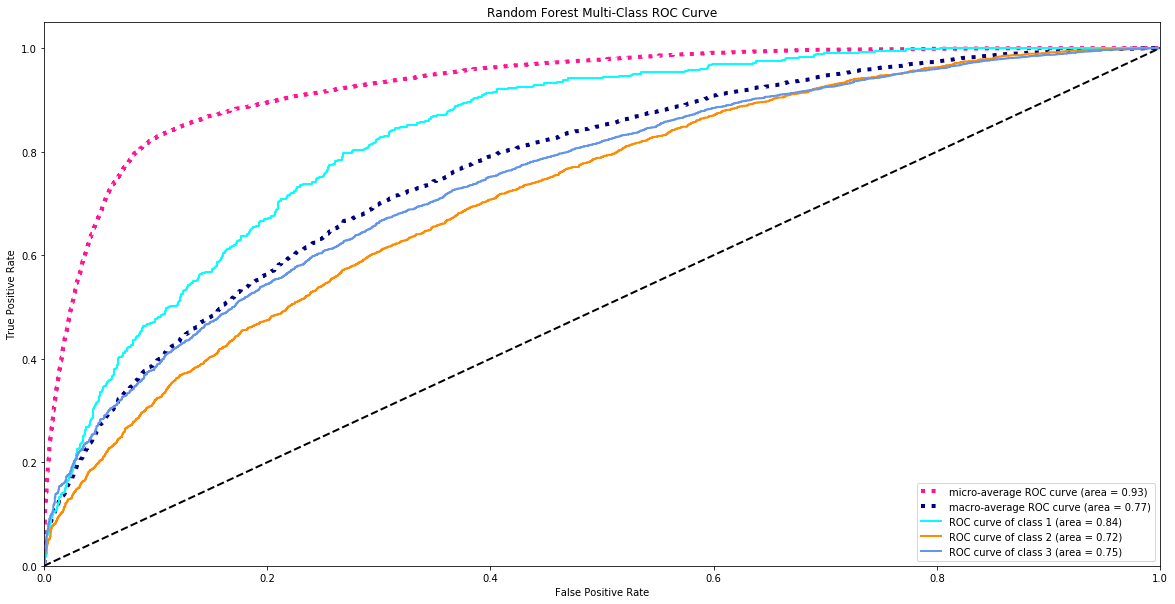

In [34]:
from sklearn.preprocessing import label_binarize

y_score_ = rforest.predict_proba(x_test)

# Binarize the output
y_ = label_binarize(y, classes=[0, 1, 2])
y_test_= label_binarize(y_test, classes=[0, 1, 2])
y_train_ = label_binarize(y_train, classes=[0, 1, 2])

n_classes = y_.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_score_[:, i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_.ravel(), y_score_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth': [5,10,15,20], 'min_samples_leaf': [1, 2],'min_samples_split': [2, 4, 6],'n_estimators': [10, 20, 30, 40] }

gsrf = model_selection.RandomizedSearchCV(ensemble.RandomForestClassifier(), parameters,
                                   cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2019))
gsrf.fit(x_train, y_train)
print('best score:', gsrf.best_score_)
print('best parameters: ', gsrf.best_params_)

best score: 0.8233279326857261
best parameters:  {'n_estimators': 30, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'gini'}


In [36]:
rforest = ensemble.RandomForestClassifier(n_estimators = 30, min_samples_split = 2, min_samples_leaf= 2, max_depth = 15, criterion = 'entropy', random_state = 2019)
rforest.fit(x_train, y_train)
predictions_rf = rforest.predict(x_test)



In [37]:
print("score: ", rforest.score(x_test, y_test))
print('-------------------------- Feature importance --------------------------')
features_rf = pd.DataFrame()
features_rf['feature'] = x_columns
features_rf['importance'] = rforest.feature_importances_
features_rf.sort_values(by=['importance'], ascending=False, inplace=True)
print(features_rf.head(10))

score:  0.8161866759195003
-------------------------- Feature importance --------------------------
                  feature  importance
20     host_duration_days    0.072583
21  listing_duration_days    0.068220
37                recency    0.065616
16  number_of_reviews_ltm    0.055575
34        min_dist_subway    0.052334
36    min_dist_attraction    0.050782
9                   price    0.049284
35          min_dist_park    0.049148
22         occupancy_rate    0.042746
11           cleaning_fee    0.037596


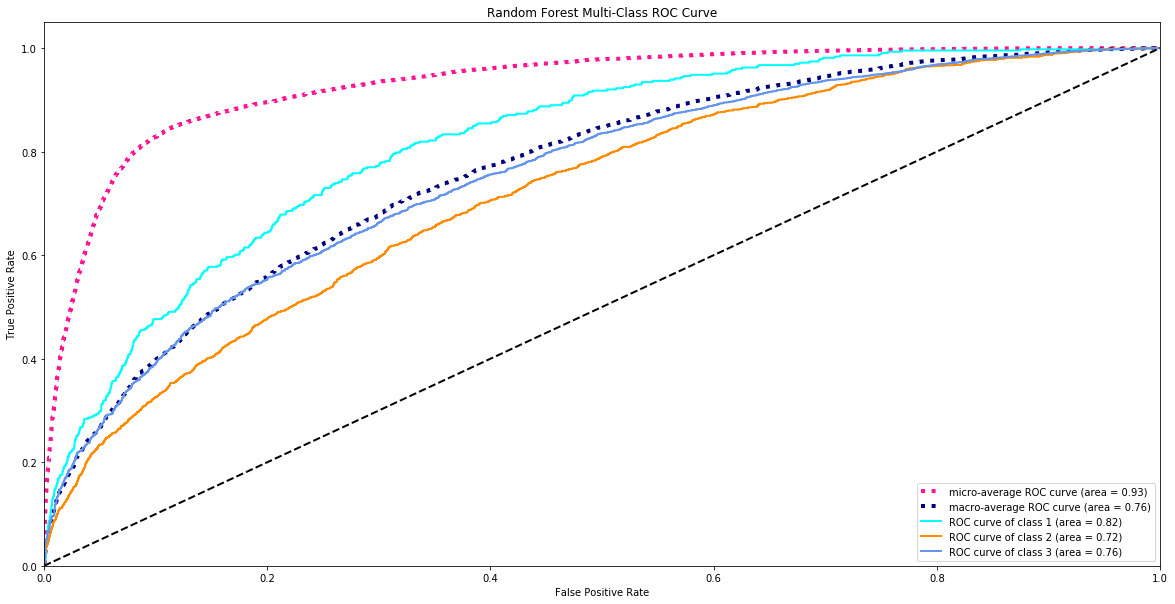

In [38]:


y_score_ = rforest.predict_proba(x_test)

# Binarize the output
y_ = label_binarize(y, classes=[0, 1, 2])
y_test_= label_binarize(y_test, classes=[0, 1, 2])
y_train_ = label_binarize(y_train, classes=[0, 1, 2])

n_classes = y_.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_score_[:, i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_.ravel(), y_score_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth': [5,10,15,20], 'min_samples_leaf': [1, 2,5,10,20,30],'min_samples_split': [2, 4, 6],'n_estimators': [10, 20, 30, 40,60,80,100] }

gsrf = model_selection.RandomizedSearchCV(ensemble.RandomForestClassifier(), parameters,
                                   cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2019))
gsrf.fit(x_train, y_train)
print('best score:', gsrf.best_score_)
print('best parameters: ', gsrf.best_params_)

In [39]:
rforest = ensemble.RandomForestClassifier(n_estimators = 80, min_samples_split = 6, min_samples_leaf= 2, max_depth = 20, criterion = 'gini', random_state = 2019)
rforest.fit(x_train, y_train)
predictions_rf = rforest.predict(x_test)


In [40]:
print("score: ", rforest.score(x_test, y_test))
print('-------------------------- Feature importance --------------------------')
features_rf = pd.DataFrame()
features_rf['feature'] = x_columns
features_rf['importance'] = rforest.feature_importances_
features_rf.sort_values(by=['importance'], ascending=False, inplace=True)
print(features_rf.head(10))

score:  0.8166204024982651
-------------------------- Feature importance --------------------------
                  feature  importance
20     host_duration_days    0.074860
37                recency    0.066091
21  listing_duration_days    0.064871
36    min_dist_attraction    0.058596
35          min_dist_park    0.057405
34        min_dist_subway    0.057292
9                   price    0.054948
22         occupancy_rate    0.046481
11           cleaning_fee    0.040140
16  number_of_reviews_ltm    0.037570


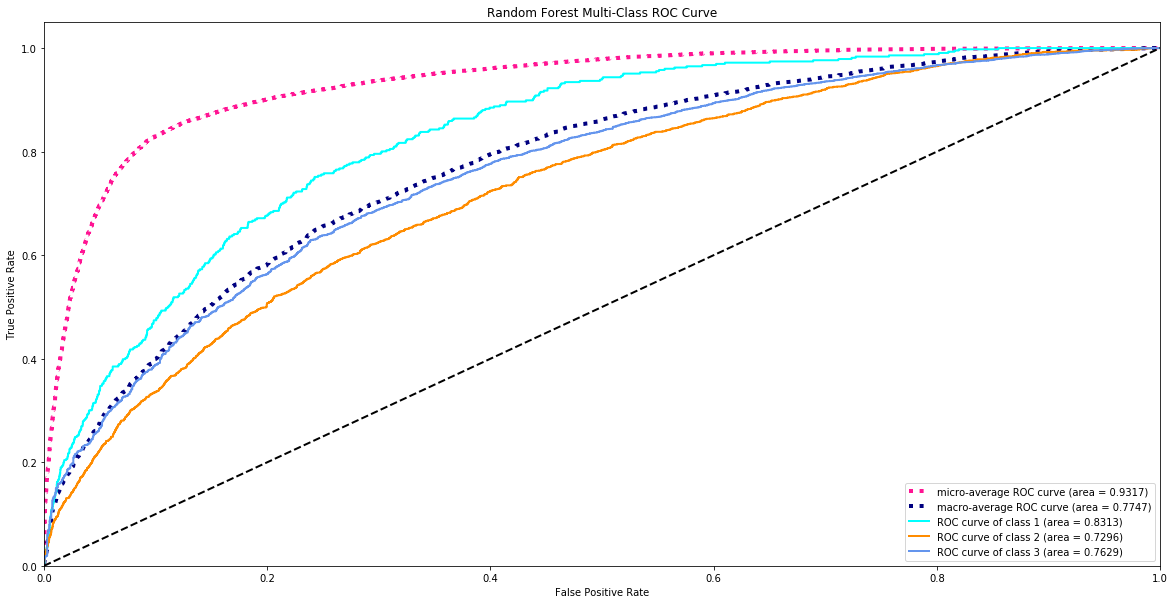

In [41]:


y_score_ = rforest.predict_proba(x_test)

# Binarize the output
y_ = label_binarize(y, classes=[0, 1, 2])
y_test_= label_binarize(y_test, classes=[0, 1, 2])
y_train_ = label_binarize(y_train, classes=[0, 1, 2])

n_classes = y_.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_score_[:, i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_.ravel(), y_score_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [43]:
features_rf1 = features_rf[0:10]
features_rf1 = features_rf1.sort_values('importance')
features_rf1

,feature,importance
16,number_of_reviews_ltm,0.037570
11,cleaning_fee,0.040140
22,occupancy_rate,0.046481
9,price,0.054948
34,min_dist_subway,0.057292
35,min_dist_park,0.057405
36,min_dist_attraction,0.058596
21,listing_duration_days,0.064871
37,recency,0.066091
20,host_duration_days,0.074860


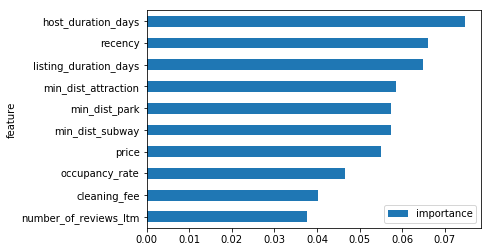

In [44]:
ax = features_rf1.plot.barh(x='feature', y='importance', rot=0)

In [45]:
x_columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews_ltm', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_duration_days', 'listing_duration_days', 'occupancy_rate',
       'crime_rate', 'hangers', 'washer', 'tv', 'detector', 'kitchen',
       'heating', 'essentials', 'iron', 'wifi', 'dryer', 'min_dist_subway',
       'min_dist_park', 'min_dist_attraction', 'recency', 'bed_type==Airbed',
       'bed_type==Couch', 'bed_type==Futon', 'bed_type==Pull-out Sofa',
       'bed_type==Real Bed', 'cancellation_policy==flexible',
       'cancellation_policy==moderate', 'cancellation_policy==strict',
       'cancellation_policy==strict_14_with_grace_period',
 